In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import pandas as pd

In [2]:
from sqlalchemy.orm import Session
engine = create_engine("sqlite:///hawaii.sqlite")
session = Session(bind=engine)
conn = engine.connect()

In [3]:
Base = automap_base()

In [4]:
Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

[]

In [6]:
session = Session(engine)

In [32]:
measures_sql = pd.read_sql("SELECT * FROM Measurement",conn)
measures_sql.head()

,measurement_id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,6,USC00519397,2010-01-07,0.06,70.0


In [8]:
station_sql = pd.read_sql("SELECT * FROM Station",conn)

In [11]:
measures_prcp = measures_sql.loc[:,('date', 'prcp' )]
measures_prcp.columns

Index(['date', 'prcp'], dtype='object')

In [12]:
import matplotlib.pyplot as plt

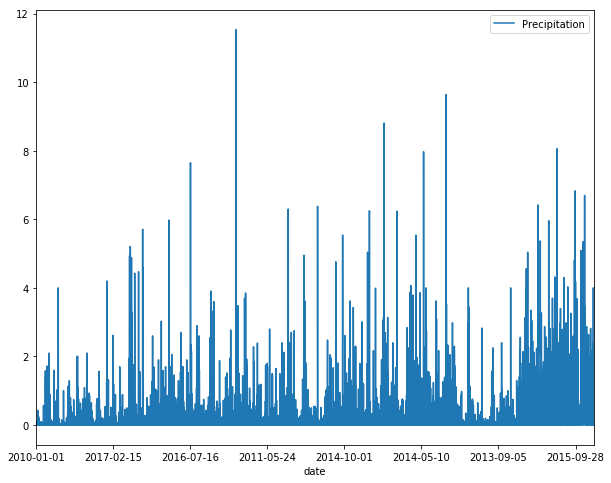

In [13]:
ax = measures_prcp.plot('date', 'prcp', figsize=(10,8))
ax.legend(["Precipitation"])
plt.show()

In [14]:
# print the summary statistics for the precipitation data.
measures_prcp['prcp'].describe()

count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: prcp, dtype: float64

In [15]:
station_sql.head()

,station_id,station,name,latitude,longitude,elevation,location
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,POINT(21.2716 -157.8168)
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6,POINT(21.4234 -157.8015)
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0,POINT(21.5213 -157.8374)
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9,POINT(21.3934 -157.9751)
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6,POINT(21.4992 -158.0111)


In [17]:
# calculate the total number of stations
measures_sql['station'].nunique()

9

In [18]:
# List the stations and observation counts in descending order
measures_sql['station'].value_counts()

USC00519281    2772
USC00513117    2696
USC00519397    2685
USC00519523    2572
USC00516128    2484
USC00514830    1937
USC00511918    1932
USC00517948     683
USC00518838     342
Name: station, dtype: int64

In [19]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs)
measures_tobs = measures_sql.loc[:,('date', 'station', 'tobs')]
measures_tobs.columns

Index(['date', 'station', 'tobs'], dtype='object')

In [20]:
measures_tobs_last12 = measures_tobs[measures_tobs['date']>='2016-08-23']
measures_tobs_last12.head()

,date,station,tobs
2326,2016-08-23,USC00519397,81.0
2327,2016-08-24,USC00519397,79.0
2328,2016-08-25,USC00519397,80.0
2329,2016-08-26,USC00519397,79.0
2330,2016-08-27,USC00519397,77.0


In [21]:
measures_tobs_last12.shape

(2021, 3)

In [22]:
measures_tobs_last12['station'].value_counts()

USC00519397    359
USC00519281    352
USC00513117    343
USC00516128    328
USC00519523    314
USC00514830    265
USC00517948     60
Name: station, dtype: int64

In [23]:
"""USC00519397 is the station with the highest number of observations"""

'USC00519397 is the station with the highest number of observations'

In [24]:
measures_tobs_last12_highest = measures_tobs_last12[measures_tobs_last12['station']=="USC00519397"]
measures_tobs_last12_highest.head()

,date,station,tobs
2326,2016-08-23,USC00519397,81.0
2327,2016-08-24,USC00519397,79.0
2328,2016-08-25,USC00519397,80.0
2329,2016-08-26,USC00519397,79.0
2330,2016-08-27,USC00519397,77.0


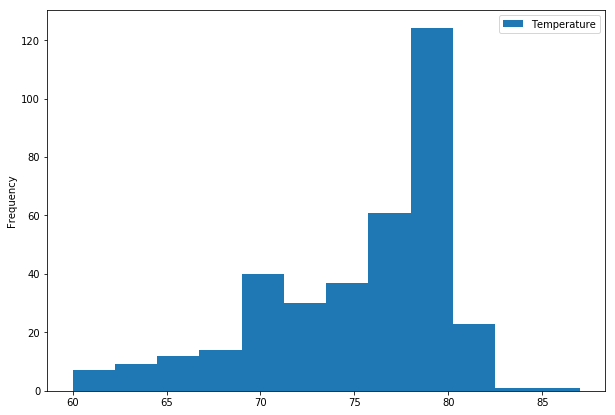

In [25]:
ax = measures_tobs_last12_highest.plot.hist('temperature', bins=12, figsize =(10,7))
ax.legend(["Temperature"])
plt.show()

In [26]:
# Temperature Analysis
def calc_temps(df, start_date, end_date):
    
    chunk = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    min_temp = chunk['tobs'].min()
    max_temp = chunk['tobs'].max()
    avg_temp = chunk['tobs'].mean()
    return min_temp, max_temp, avg_temp

In [27]:
result = calc_temps(measures_sql, "2017-08-10", "2017-08-23")
result

(70.0, 84.0, 78.65306122448979)

In [28]:
result_list = list(result)

In [29]:
result_df = pd.DataFrame({'min' : result_list[0], 'max': result_list[1], 'average': result_list[2]}, index=[0])
result_df

,average,max,min
0,78.653061,84.0,70.0


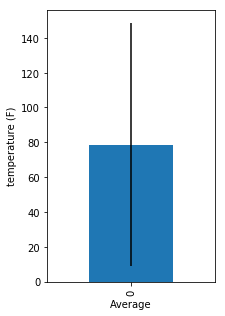

In [30]:
ax = result_df['average'].plot(kind='bar', yerr=[result_df['min'],result_df['max']], figsize =(3,5) )
ax.set_ylabel('temperature (F)')
ax.set_xlabel("Average")
plt.show()